In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pylab as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

In [2]:
wdbc_ori =  pd.read_csv("data/wdbc.data", header = None)
wdbc = pd.read_csv("data/wdbc.data", header = None)
name_list = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
'smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
 'symmetry_mean','fractal dimension_mean','radius_se','texture_se','perimeter_se',
'area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
'symmetry_se','fractal dimension_se','radius_worst','texture_worst','perimeter_worst',
'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
'symmetry_worst','fractal dimension_worst']
wdbc.columns = name_list
wdbc_ori.columns = name_list
wdbc[name_list[2:]] = wdbc[name_list[2:]].astype(float)

wdbc = wdbc.drop(['id'],axis = 1)
wdbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Mlignant shape:  (212, 31)
Benign shape: (357, 31)


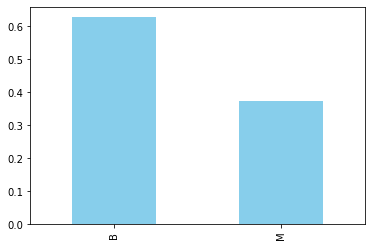

In [3]:
print("Mlignant shape: ", wdbc[wdbc['diagnosis'] == 'M'].shape)
print("Benign shape:" ,wdbc[wdbc['diagnosis'] == 'B'].shape)
y_frac = wdbc_ori['diagnosis'].value_counts()/wdbc_ori['diagnosis'].shape
y_frac.plot(kind='bar', stacked=True,color = "skyblue")
plt.savefig('figures/target_barplot.png',dpi=300)
plt.show()

In [4]:
describe = wdbc.describe()
# describe = describe.drop("diagnosis",axis = 1)
describe
#describe.to_csv("describe.csv")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Standard Data Scaling
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
wdbc[name_list[2:]] = scaler.fit_transform(wdbc[name_list[2:]])

# Label target variable
leb = LabelEncoder()
wdbc[["diagnosis"]] = leb.fit_transform(wdbc["diagnosis"])
wdbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [6]:
#print (wdbc.dtypes)
wdbc.to_csv("wdbc_pro.csv")

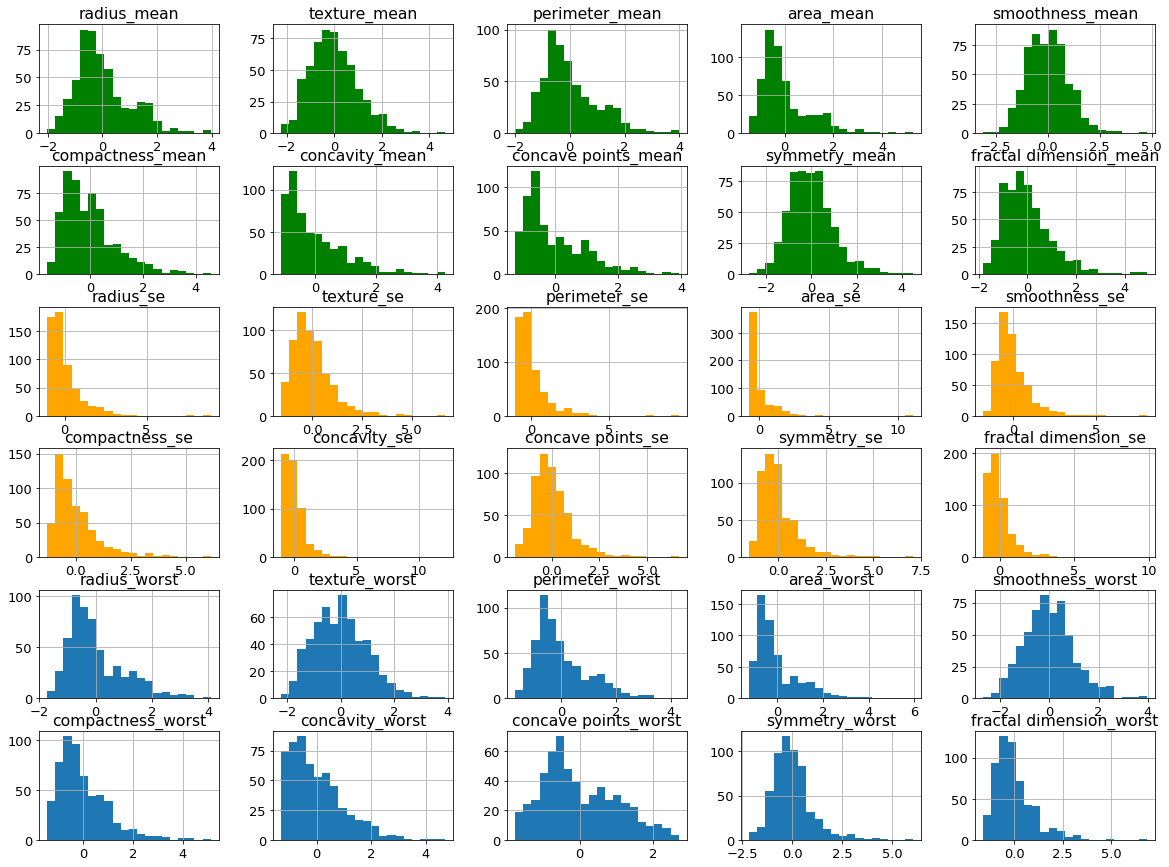

In [48]:
# histogram
plt.rcParams.update({'font.size': 13})
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(20,15))
r = 0
c = 0
for var in name_list[2:]:
    if r < 2: 
        wdbc.hist(var,bins = 20, ax=axes[r,c], color = "green")
    elif 2<=r<4:
        wdbc.hist(var,bins = 20, ax=axes[r,c], color = "orange")
    elif r>=4:
        wdbc.hist(var,bins = 20, ax=axes[r,c])
    c += 1 
    if c>4:
        r += 1
        c = 0

In [8]:
wdbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [9]:
# Draw histogram by target class

def hist_draw(df,col,lab):
    # fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(20,15))
    r = 0
    c = 0
    for var in name_list[2:]:
        if r == 0 and c == 0:
            df.hist(var,bins = 30, ax=axes[r,c], color = col,
                    alpha=0.6,label=lab)
        else:
            df.hist(var,bins = 30, ax=axes[r,c], color = col,
                    alpha=0.6)
        c += 1 
        if c>4:
            r += 1
            c = 0
    fig.legend(loc='center left')

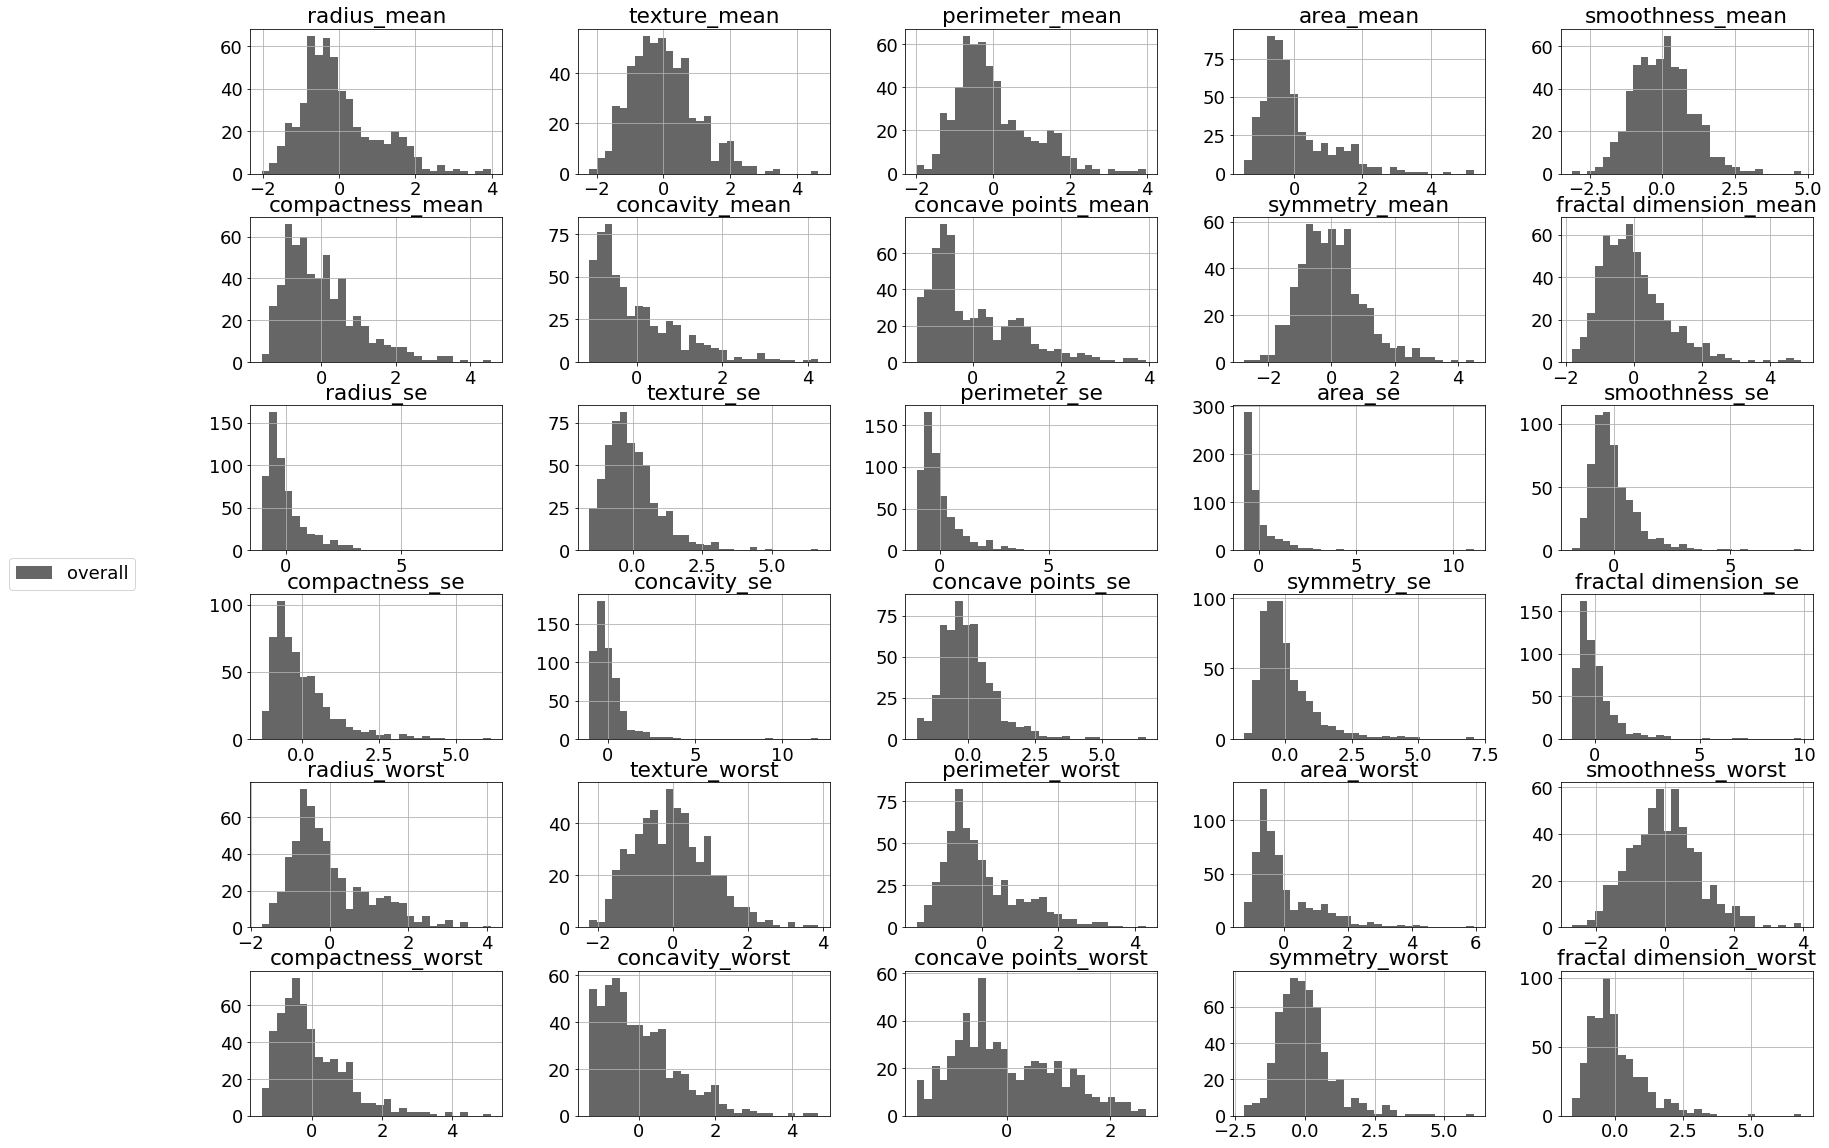

In [44]:
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(28,20))
hist_draw(wdbc,col = 'black',lab='overall')
plt.savefig('figures/overall_hist.png',dpi=300)

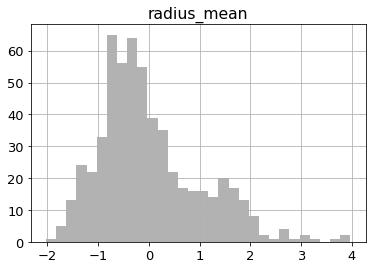

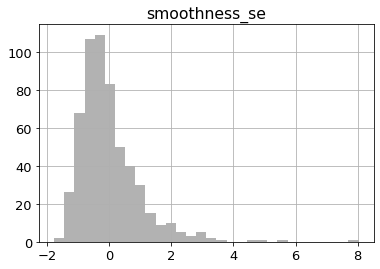

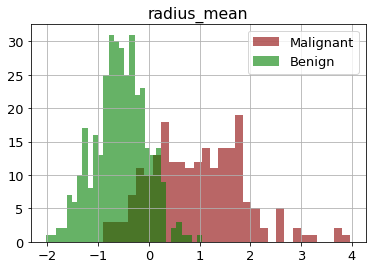

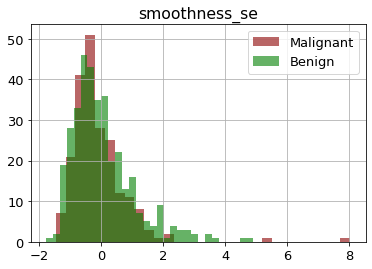

In [66]:
wdbc.hist("radius_mean",bins = 30,color = "grey",alpha=0.6)
plt.savefig('figures/radius_mean_hist.png',dpi=50)
plt.show()
wdbc.hist("smoothness_se",bins = 30,color = "grey",alpha=0.6)
plt.savefig('figures/smoothness_se_hist.png',dpi=50)
plt.show()

target_mali.hist("radius_mean",bins = 30,color = "darkred",alpha=0.6,label ='Malignant')
plt.hist(target_beni["radius_mean"],bins = 30,color = "green",alpha=0.6,label ='Benign')
plt.savefig('figures/radius_mean_separate.png',dpi=50)
plt.legend()

target_mali.hist("smoothness_se",bins = 30,color = "darkred",alpha=0.6,label ='Malignant')
plt.hist(target_beni["smoothness_se"],bins = 30,color = "green",alpha=0.6,label ='Benign')
plt.savefig('figures/smoothness_se_separate.png',dpi=50)
plt.legend()

In [11]:
target_mali = wdbc[wdbc['diagnosis']==1]
target_beni = wdbc[wdbc['diagnosis']==0]

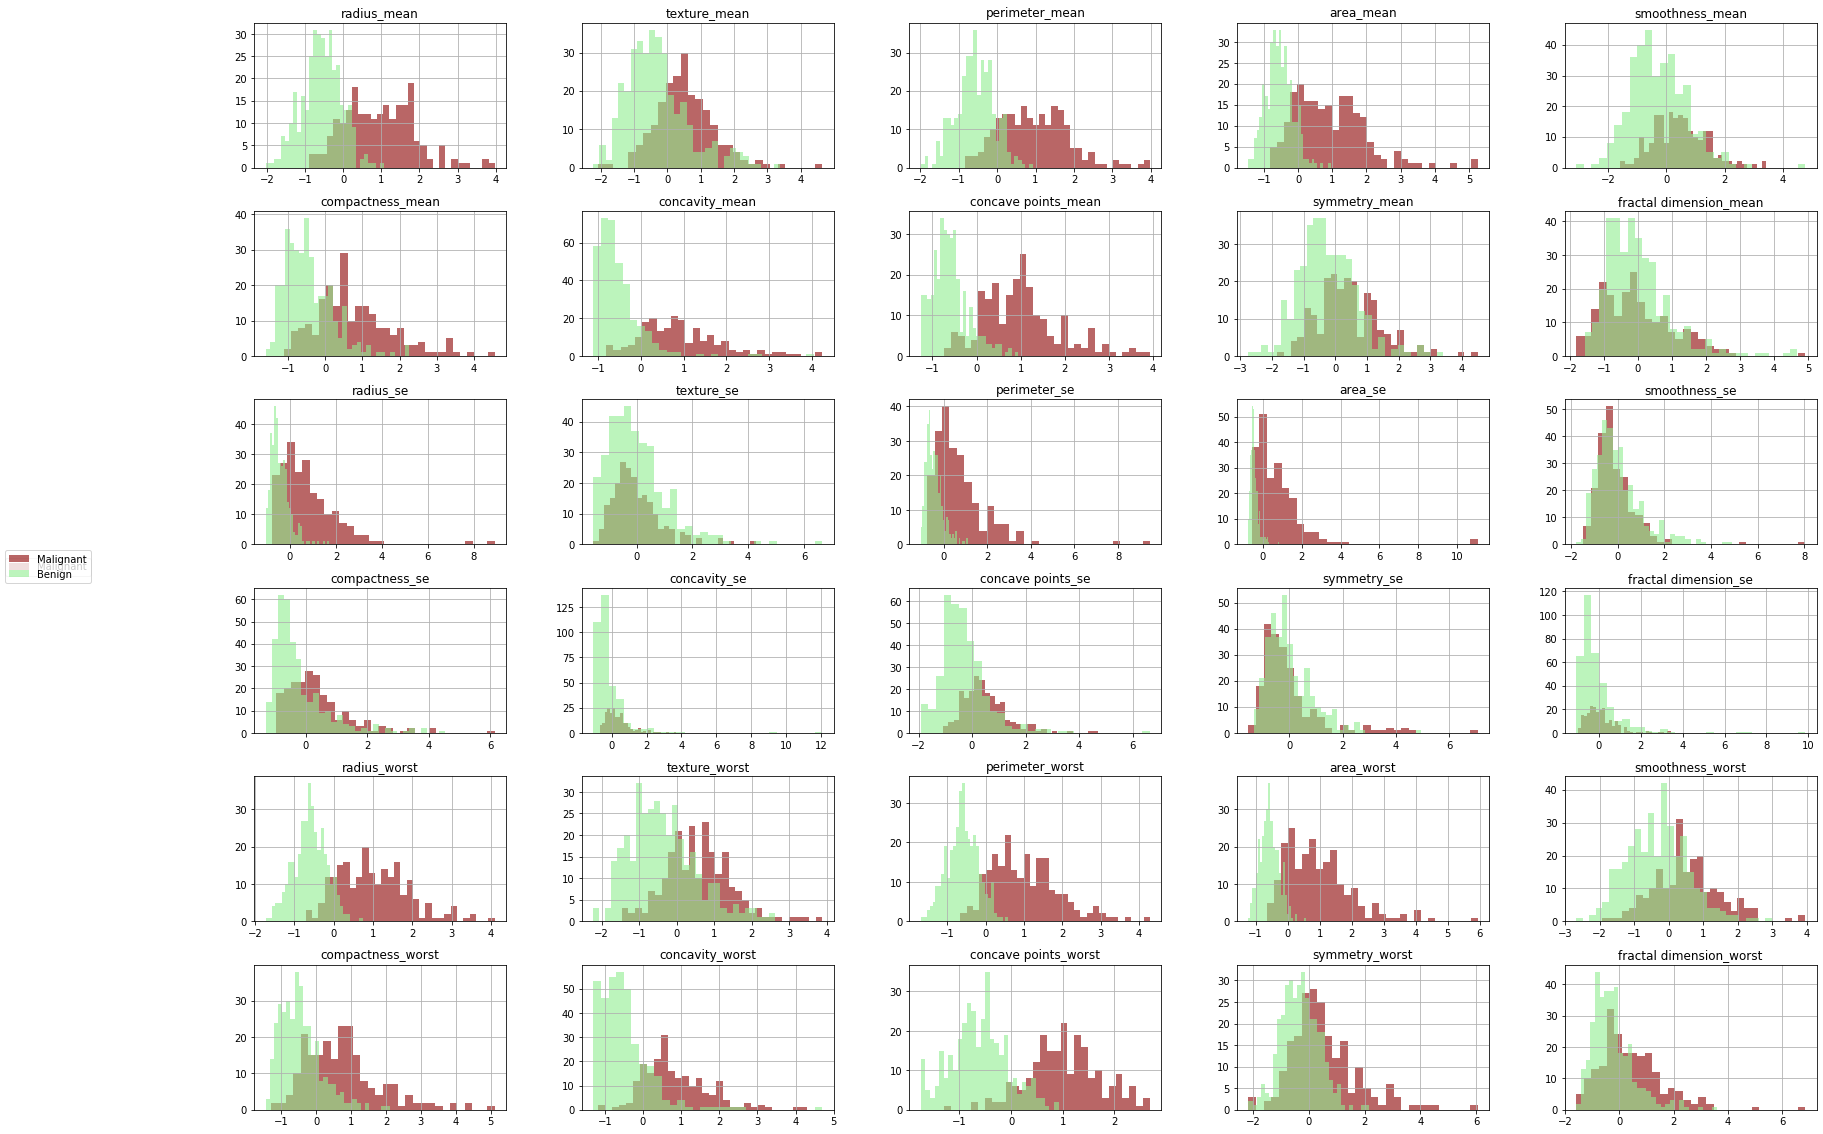

In [12]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(28,20))
hist_draw(target_mali,col = 'darkred',lab='Malignant')
hist_draw(target_beni,col = 'lightgreen',lab='Benign')
plt.savefig('figures/target_hist.png',dpi=300)

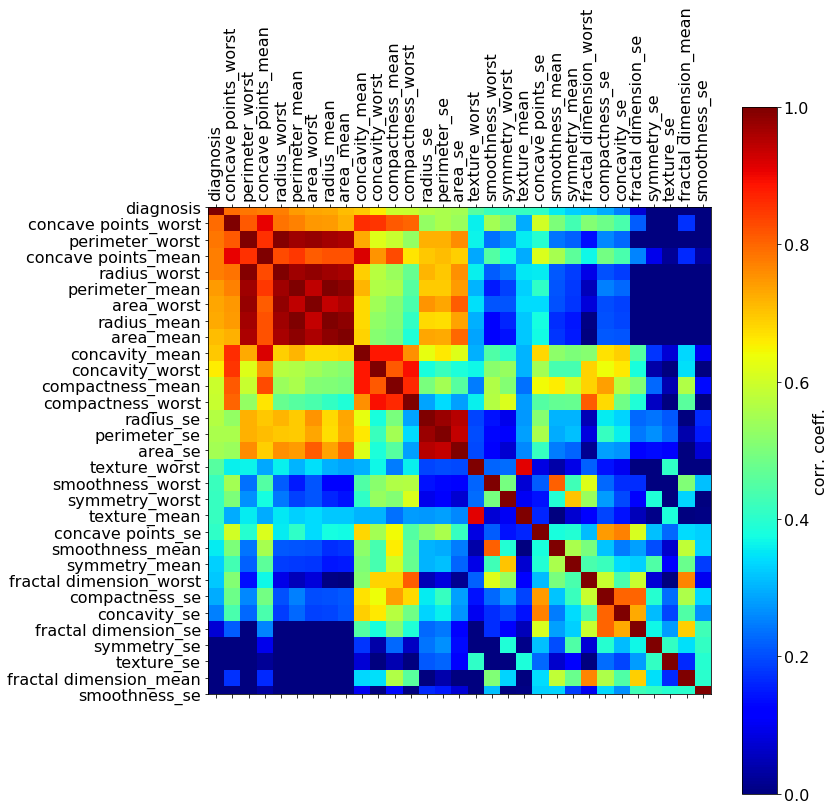

In [41]:
# Correlation Matrix and sorting based on target
# wdbc_X = wdbc.drop(["id","diagnosis"],axis=1)
corrmat = wdbc.corr()
plt.rcParams.update({'font.size': 16})
all_cols = corrmat.sort_values('diagnosis',ascending=False)['diagnosis'].index 
cols = all_cols
cm_order = corrmat.loc[cols,cols]

plt.figure(figsize=(12,12))
plt.matshow(cm_order,cmap='jet',fignum=0,vmin=0, vmax=1)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm_order.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm_order.shape[0]),list(cols))
plt.tight_layout()
plt.savefig('figures/corr_coeff.png',dpi=300)
plt.show()
plt.rcParams.update({'font.size': 10})

In [14]:
f_order = list(cm_order.index[1:])
f_order

wdbc_X = wdbc.drop(["diagnosis"],axis=1)
wdbc_Y = wdbc["diagnosis"]
f_test, p_values = f_classif(wdbc_X,wdbc_Y)
names = list(wdbc_X.columns)
f_temp = pd.DataFrame([f_test])
f_temp.columns = names
f_inorder = pd.DataFrame()
for feature in f_order:
    f_inorder[feature] = f_temp[feature]
f_inorder
# f_select = SelectKBest(f_classif,k=10)
# X_f = f_select.fit_transform(wdbc_X, wdbc_Y)
# f_result = f_select.get_support()
# f_result
# feature_names[f_result]

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,...,smoothness_mean,symmetry_mean,fractal dimension_worst,compactness_se,concavity_se,fractal dimension_se,symmetry_se,texture_se,fractal dimension_mean,smoothness_se
0,964.385393,897.944219,861.67602,860.781707,697.235272,661.600206,646.981021,573.060747,533.793126,436.691939,...,83.651123,69.527444,66.443961,53.247339,39.014482,3.468275,0.024117,0.039095,0.093459,2.557968


In [15]:
mi = mutual_info_classif(wdbc_X, wdbc_Y)
print('mi',mi)
names = list(wdbc_X.columns)
mi_temp = pd.DataFrame([mi])
mi_temp.columns = names
mi_inorder = pd.DataFrame()
for feature in f_order:
    mi_inorder[feature] = mi_temp[feature]
mi_inorder

mi [0.36626734 0.09332691 0.40285119 0.35836095 0.0870388  0.2113623
 0.37283996 0.43983511 0.06364089 0.00457014 0.24933676 0.
 0.27553212 0.33990317 0.01572246 0.07806674 0.11833773 0.12629972
 0.00995892 0.04016708 0.45665184 0.12212558 0.47257284 0.46320999
 0.10956821 0.2266277  0.3159833  0.43493255 0.09035851 0.0692931 ]


,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,...,smoothness_mean,symmetry_mean,fractal dimension_worst,compactness_se,concavity_se,fractal dimension_se,symmetry_se,texture_se,fractal dimension_mean,smoothness_se
0,0.434933,0.472573,0.439835,0.456652,0.402851,0.46321,0.366267,0.358361,0.37284,0.315983,...,0.087039,0.063641,0.069293,0.078067,0.118338,0.040167,0.009959,0.0,0.00457,0.015722


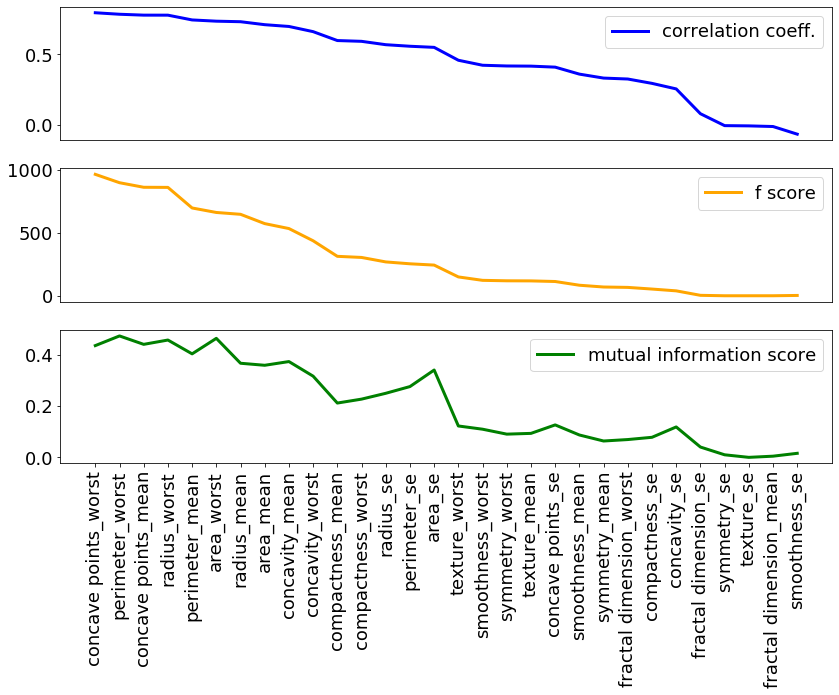

In [72]:
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,10))


axes[0].plot(cm_order['diagnosis'][1:],color = "blue",label="correlation coeff.",linewidth = 3.0)
axes[0].set_xticks([])
axes[0].legend()

axes[1].plot(f_inorder.iloc[0],color = "orange",label="f score",linewidth=3.0)
axes[1].set_xticks([])
axes[1].legend()

axes[2].plot(mi_inorder.iloc[0],color = "green",label="mutual information score",linewidth=3.0)
axes[2].legend()


plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('figures/score_trend.png',dpi=150)
plt.show()

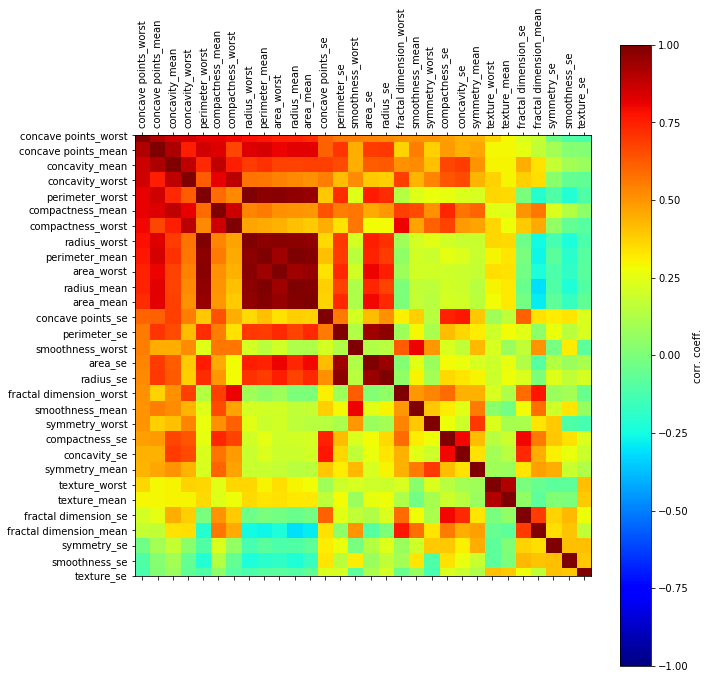

In [17]:
wdbc_X = wdbc.drop(["diagnosis"],axis=1)
corrmat_X = wdbc_X.corr()

all_cols = corrmat_X.sort_values('concave points_worst',ascending=False)['concave points_worst'].index 
cols = all_cols

cm = corrmat_X.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='jet',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()
# plt.savefig('figures/corr_coeff_dummies.png',dpi=300)
plt.show()

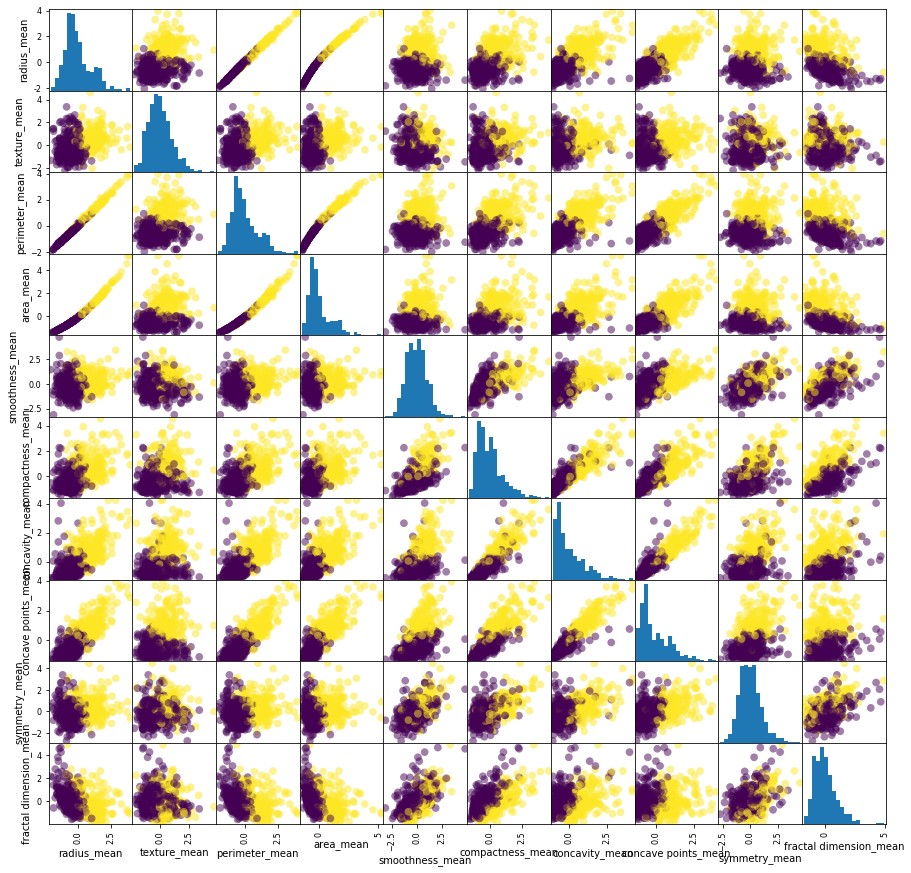

In [18]:
pd.plotting.scatter_matrix(wdbc_X.iloc[:,0:10], c = wdbc_Y, 
                           figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=0.5)
plt.show()

In [19]:
# import pandas as pd
# import scipy.cluster.hierarchy as spc

# corr = corrmat_X.values

# pdist = spc.distance.pdist(corr)
# linkage = spc.linkage(pdist, method='complete')
# idx = spc.fcluster(linkage, 0.6*pdist.max(), 'distance')
# # corr_reorder = 

In [20]:
# corrmat_X1 = corrmat_X.copy()
# corrmat_X1["cluster"] = idx
# all_cols = corrmat_X1.sort_values('cluster',ascending=True)['cluster'].index 
# cols = all_cols
# cm = corrmat_X.loc[cols,cols]
# plt.figure(figsize=(10,10))
# plt.matshow(cm,vmin=-1,vmax=1,cmap='jet',fignum=0)
# plt.colorbar(label='corr. coeff.')
# plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
# plt.yticks(np.arange(cm.shape[0]),list(cols))
# plt.tight_layout()
# # plt.savefig('figures/corr_coeff_dummies.png',dpi=300)
# plt.show()

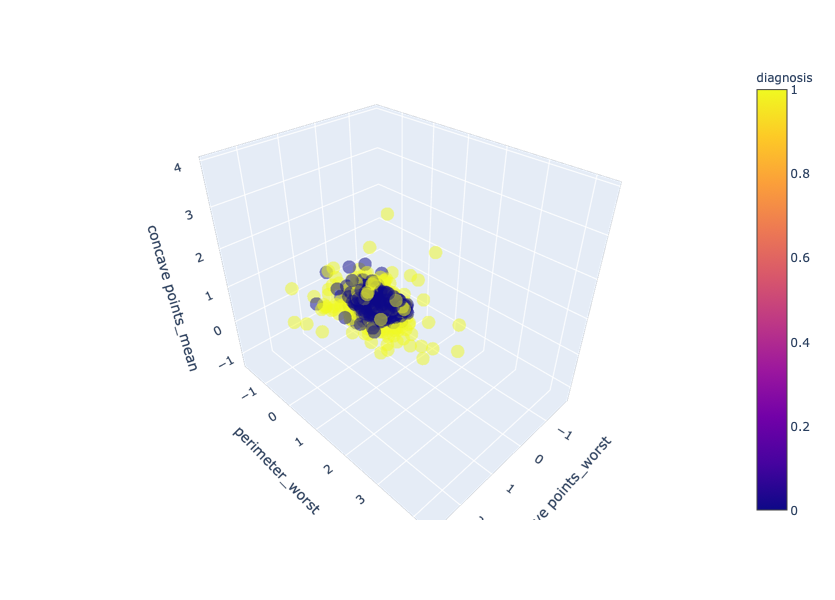

In [77]:
import plotly.express as px
fig = px.scatter_3d(wdbc, x='concave points_worst', y='perimeter_worst', z='concave points_mean',
              color='diagnosis', opacity=0.5)
fig.show()

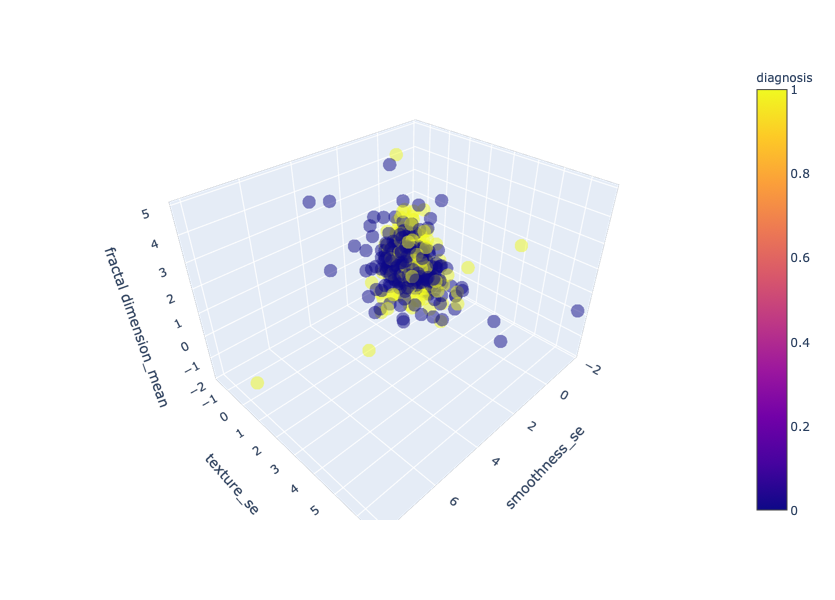

In [80]:
import plotly.express as px
fig = px.scatter_3d(wdbc, x='smoothness_se', y='texture_se', z='fractal dimension_mean',
              color='diagnosis', opacity=0.5)
fig.show()